In [45]:
#Importing the neccesary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

In [46]:
#Load the data
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [47]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [48]:
#Check the statistical summary of the data
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [49]:
#Check the details of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [50]:
#Data is having 158 rows and 12 columns
df.shape

(158, 12)

In [51]:
#Checking for null values
df.isnull().sum().sum()

0

In [52]:
#Dropping irrelevant columns
df=df.drop(columns=["Standard Error","Region","Happiness Rank","Country","Dystopia Residual"],axis=1)


In [53]:
#Rounding of the decimal values
df.round(3)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458
...,...,...,...,...,...,...,...
153,3.465,0.222,0.774,0.429,0.592,0.552,0.226
154,3.340,0.287,0.354,0.319,0.484,0.080,0.183
155,3.006,0.663,0.475,0.722,0.157,0.189,0.472
156,2.905,0.015,0.416,0.224,0.118,0.101,0.197


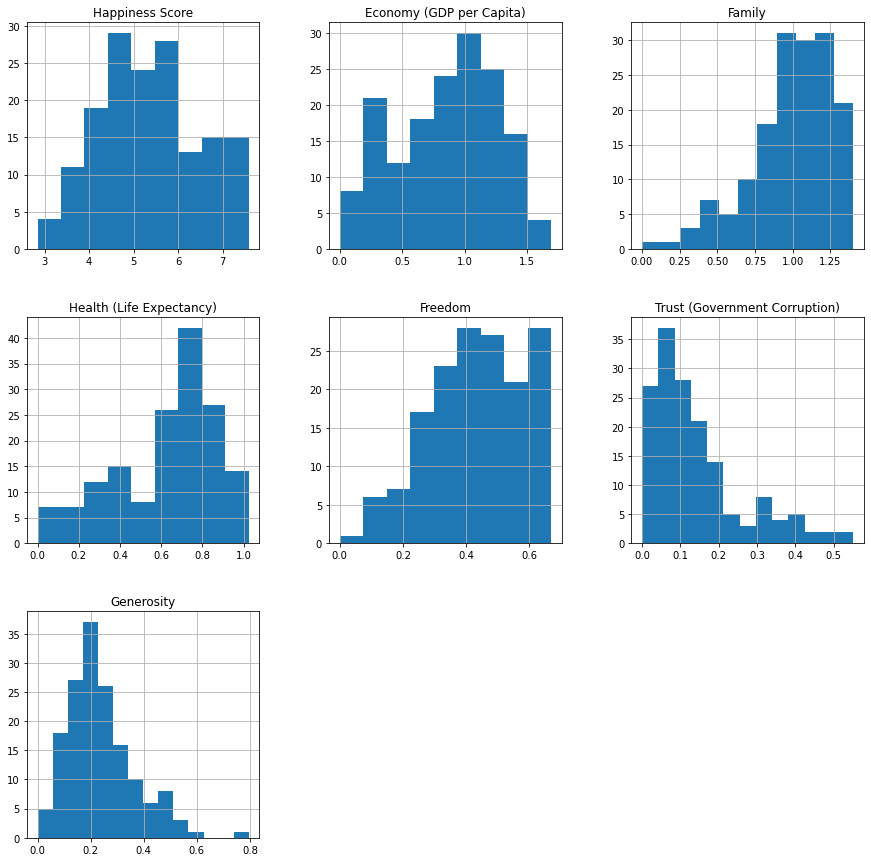

In [54]:
#Checking the frequency distribution of the variables
df.hist(bins='auto', figsize=(15,15));

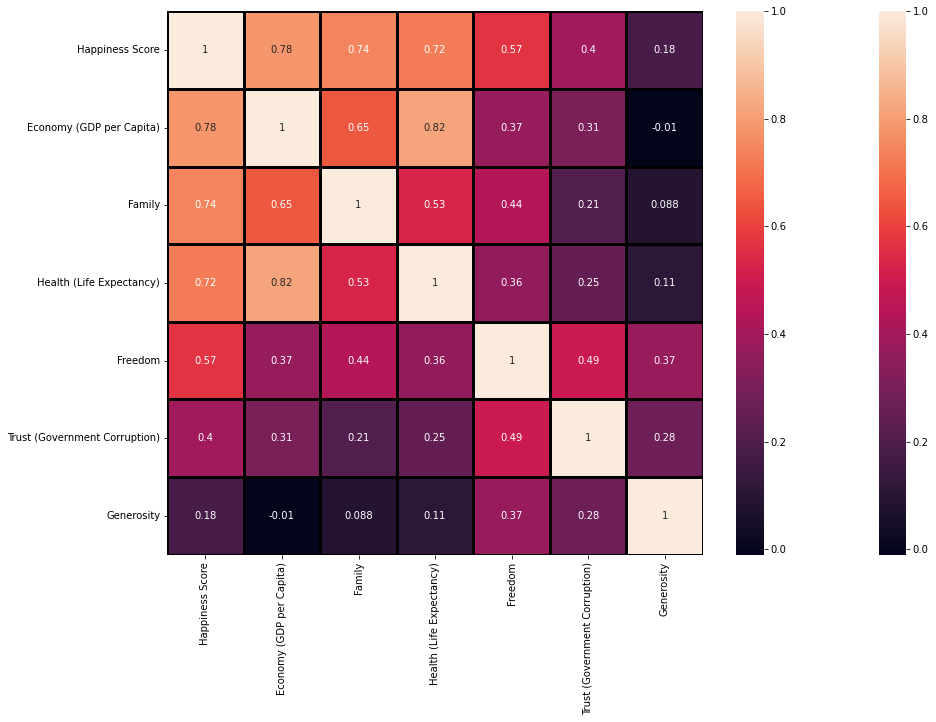

In [55]:
# let's see the correlation between the features
# Checking the correlation of features helps us decide which features affect the target variable the most, and in turn, get used in predicting the target variable.
plt.figure(figsize=(15, 10))                 # This specifies the size, the bigger the map, the easier we can understand the map

sns.heatmap(df.corr())                # This is sufficient but adding the 'annot' argument makes interpretaton easier

sns.heatmap(df.corr(), annot = True, linewidths=3, linecolor='black')  # 'annot' helps display the correlation coefficient


plt.show()

In [56]:
df.corr()["Happiness Score"].sort_values(ascending=False)


Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Name: Happiness Score, dtype: float64

In [80]:
#Happiness Score correlates  very less with Generosity, hence removing the feature
happy=df.drop(["Generosity"],axis=1)

#Splitting data into train and test
from sklearn.model_selection import train_test_split


In [70]:
X=happy[["Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)"]]
Y=happy["Happiness Score"]

In [81]:
# We need to scale the data before feeding it to the model
# To standardize our data, we need to import the StandardScaler from the sklearn library 

from sklearn.preprocessing import StandardScaler 

scale=StandardScaler()

X1=scale.fit_transform(X)

In [72]:
# Importing neccesary modules for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

lr=LinearRegression()

In [92]:
#Checking different random state values for the best r2-score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state", i,"the r2 score is", r2_score(y_train,pred_train))

At random state 0 the r2 score is 0.8003088429382661
At random state 1 the r2 score is 0.7621470284696805
At random state 2 the r2 score is 0.7789717628758352
At random state 3 the r2 score is 0.7548289915954285
At random state 4 the r2 score is 0.755601336523628
At random state 5 the r2 score is 0.7908989150900955
At random state 6 the r2 score is 0.7657722389307207
At random state 7 the r2 score is 0.7894597588573438
At random state 8 the r2 score is 0.7689475738680674
At random state 9 the r2 score is 0.783243664947875
At random state 10 the r2 score is 0.7684468656064929
At random state 11 the r2 score is 0.7682069865459618
At random state 12 the r2 score is 0.8049194207189613
At random state 13 the r2 score is 0.7963246480715361
At random state 14 the r2 score is 0.7501919259044956
At random state 15 the r2 score is 0.7533198274679218
At random state 16 the r2 score is 0.7877435906757972
At random state 17 the r2 score is 0.7672464869065209
At random state 18 the r2 score is 0.786

At random state 186 the r2 score is 0.783134392750357
At random state 187 the r2 score is 0.7741563918127972
At random state 188 the r2 score is 0.7985670189198897
At random state 189 the r2 score is 0.7917355595646902
At random state 190 the r2 score is 0.7436680110341882
At random state 191 the r2 score is 0.8091934184424981
At random state 192 the r2 score is 0.777667392245522
At random state 193 the r2 score is 0.7278405930617925
At random state 194 the r2 score is 0.789813061559879
At random state 195 the r2 score is 0.8039673567738613
At random state 196 the r2 score is 0.7811664548032473
At random state 197 the r2 score is 0.7447339381325551
At random state 198 the r2 score is 0.7530072587050192
At random state 199 the r2 score is 0.8037202081573807
At random state 200 the r2 score is 0.7970501960457015
At random state 201 the r2 score is 0.7839295789695919
At random state 202 the r2 score is 0.7906860409214844
At random state 203 the r2 score is 0.7771724051203056
At random sta

At random state 340 the r2 score is 0.7787935168509815
At random state 341 the r2 score is 0.7552728633964074
At random state 342 the r2 score is 0.777414513453109
At random state 343 the r2 score is 0.7678964669525711
At random state 344 the r2 score is 0.7639199871051947
At random state 345 the r2 score is 0.7739068214883258
At random state 346 the r2 score is 0.7771088774496535
At random state 347 the r2 score is 0.7752563739849178
At random state 348 the r2 score is 0.7944408285426575
At random state 349 the r2 score is 0.7691629013134689
At random state 350 the r2 score is 0.8089268051285492
At random state 351 the r2 score is 0.7904237000361456
At random state 352 the r2 score is 0.7539613461378151
At random state 353 the r2 score is 0.764071221161933
At random state 354 the r2 score is 0.7765611804121503
At random state 355 the r2 score is 0.7555423047069572
At random state 356 the r2 score is 0.7533705490857869
At random state 357 the r2 score is 0.7800970513958252
At random st

At random state 493 the r2 score is 0.7484139243394319
At random state 494 the r2 score is 0.7535036140514731
At random state 495 the r2 score is 0.7463545330466659
At random state 496 the r2 score is 0.8002375280129459
At random state 497 the r2 score is 0.7703496814993595
At random state 498 the r2 score is 0.7688798957824803
At random state 499 the r2 score is 0.7656466717464928
At random state 500 the r2 score is 0.7738389142662647
At random state 501 the r2 score is 0.8106907674601028
At random state 502 the r2 score is 0.7465249302391077
At random state 503 the r2 score is 0.788509927347385
At random state 504 the r2 score is 0.8092057331458383
At random state 505 the r2 score is 0.7762066641705834
At random state 506 the r2 score is 0.7918138110239503
At random state 507 the r2 score is 0.7949902123298608
At random state 508 the r2 score is 0.7758580788626587
At random state 509 the r2 score is 0.7823134499934778
At random state 510 the r2 score is 0.7316912018688484
At random s

At random state 681 the r2 score is 0.7516607579129866
At random state 682 the r2 score is 0.7676312842316152
At random state 683 the r2 score is 0.7811322584964696
At random state 684 the r2 score is 0.7717532836238937
At random state 685 the r2 score is 0.778683800850832
At random state 686 the r2 score is 0.7752489580547594
At random state 687 the r2 score is 0.8099407127675543
At random state 688 the r2 score is 0.7629930312937045
At random state 689 the r2 score is 0.7656123673435009
At random state 690 the r2 score is 0.7878988699612288
At random state 691 the r2 score is 0.7703806589155164
At random state 692 the r2 score is 0.7665962228310769
At random state 693 the r2 score is 0.7757450537460788
At random state 694 the r2 score is 0.7387871219670739
At random state 695 the r2 score is 0.7941816105045186
At random state 696 the r2 score is 0.7785375369317118
At random state 697 the r2 score is 0.7731193417800276
At random state 698 the r2 score is 0.7604378519429444
At random s

At random state 855 the r2 score is 0.8096265513743297
At random state 856 the r2 score is 0.7962928683735392
At random state 857 the r2 score is 0.7634772078222324
At random state 858 the r2 score is 0.7579275506653805
At random state 859 the r2 score is 0.754342228997654
At random state 860 the r2 score is 0.8032943096538695
At random state 861 the r2 score is 0.7965996194377032
At random state 862 the r2 score is 0.7393772569970901
At random state 863 the r2 score is 0.7872806199323844
At random state 864 the r2 score is 0.7871515877013384
At random state 865 the r2 score is 0.7691234700865308
At random state 866 the r2 score is 0.7887404766099484
At random state 867 the r2 score is 0.7756952012709866
At random state 868 the r2 score is 0.7701691363535864
At random state 869 the r2 score is 0.7920493487078483
At random state 870 the r2 score is 0.7713077860544655
At random state 871 the r2 score is 0.7497474834734018
At random state 872 the r2 score is 0.7597647355331383
At random s

In [96]:
#Evaluating the R2 Score
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,Y,test_size=0.25,random_state=85)
lr.fit(x_train1,y_train1)
pred_train1=lr.predict(x_train1)
pred_test1=lr.predict(x_test1)
    
print(r2_score(y_train1,pred_train1))

0.8160136485822151
